In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
train = pd.read_csv('Classification_train_1.csv')
train

,ID,cycles,T24,T30,T50,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32,labels
0,1,1,641.82,1589.70,1400.60,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0
1,1,2,642.15,1591.82,1403.14,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0
2,1,3,642.35,1587.99,1404.20,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0
3,1,4,642.35,1582.79,1401.87,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0
4,1,5,642.37,1582.85,1406.22,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,2
20627,100,197,643.54,1604.50,1433.58,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,2
20628,100,198,643.42,1602.46,1428.18,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,2


### Labels corresponding to each conditions
- Good Condition - 0
- Moderate Condition - 1
- Warning Condition - 2

In [14]:
from sklearn.preprocessing import MinMaxScaler
df = train.copy()

In [15]:
# Scaling
trf = ColumnTransformer([
    ('scale', MinMaxScaler(), slice(2,15))  # Use column explicitly
], remainder='passthrough')

In [16]:
# Split the data into features and target variable
X = train.drop(columns=['labels'])
y = train['labels']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
# Create the pipeline
pipe = Pipeline([
    ('scaling', trf),                         # Scale the specified columns
    ('model', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))  # Train the model
])

In [19]:
pipe.named_steps

{'scaling': ColumnTransformer(remainder='passthrough',
                   transformers=[('scale', MinMaxScaler(), slice(2, 15, None))]),
 'model': GradientBoostingClassifier(n_estimators=200, random_state=42)}

In [20]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', MinMaxScaler(),
                                                  slice(2, 15, None))])),
                ('model',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

Accuracy: 0.9280348921734917


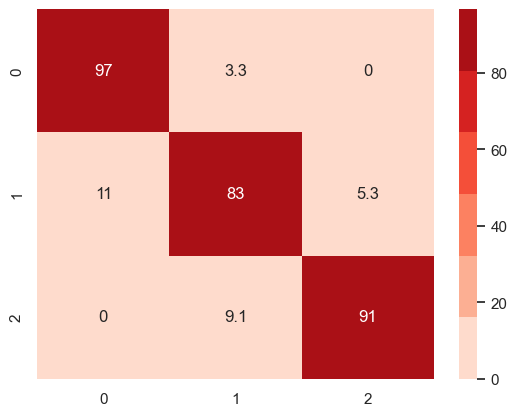

In [21]:
# Predict on the test data
y_pred = pipe.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

sns.set(font_scale=1.0) #edited as suggested
cm = pd.DataFrame(confusion_matrix(y_test, y_pred, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)
plt.show()

In [22]:
input_data = np.array([1,	5,	643.6,	1590.21,	1415.22,	2388.06,	9055.15,	47.28,	522.19,
                       2388.04, 8133.80,	8.4294,	393,	38.90,	23.4044]).reshape(1, -1)

# Use the model to make a prediction
prediction = pipe.predict(input_data)

# Print the prediction
print(f"The predicted class is: {prediction[0]}")

The predicted class is: 0


In [23]:
df = train.copy()

In [24]:
def plot_temp_LPC_graph(train, id, input_data=input_data):
  if(id == input_data[0][0]):
    # Extract specific data points
    x = input_data[0][1]
    y = input_data[0][2]
    z = input_data[0][3]
    w = input_data[0][4]

    # Create a single subplot
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    train_1 = train[train['ID'] == id]

    # 1st graph
    sns.scatterplot(x=[x], y=[y], s=150, ax=axes[0], label='Input data')
    sns.lineplot(x='cycles', y='T24', data=train_1, color='green', ax=axes[0], label='Past performance')
    axes[0].set_title('Total temperature at LPC outlet vs Cycles')
    axes[0].set_xlabel('Cycles')
    axes[0].set_ylabel('Total temperature at LPC outlet (R)')
    axes[0].legend()

    # 2nd graph
    sns.scatterplot(x=[x], y=[z], s=150, ax=axes[1], label='Input data')
    sns.lineplot(x='cycles', y='T30', data=train_1, color='red', ax=axes[1], label='Past performance')
    axes[1].set_title('Total temperature at HPC outlet vs Cycles')
    axes[1].set_xlabel('Cycles')
    axes[1].set_ylabel('Total temperature at HPC outlet (R)')
    axes[1].legend()

    # 3rd graph
    sns.scatterplot(x=[x], y=[w], s=150, ax=axes[2], label='Input data')
    sns.lineplot(x='cycles', y='T50', data=train_1, color='orange', ax=axes[2], label='Past performance')
    axes[2].set_title('Total temperature at LPT outlet vs Cycles')
    axes[2].set_xlabel('Cycles')
    axes[2].set_ylabel('Total temperature at LPT outlet (R)')
    axes[2].legend()

    # Show plot
    plt.tight_layout()
    plt.show()
  else:
    print("Invalid input")


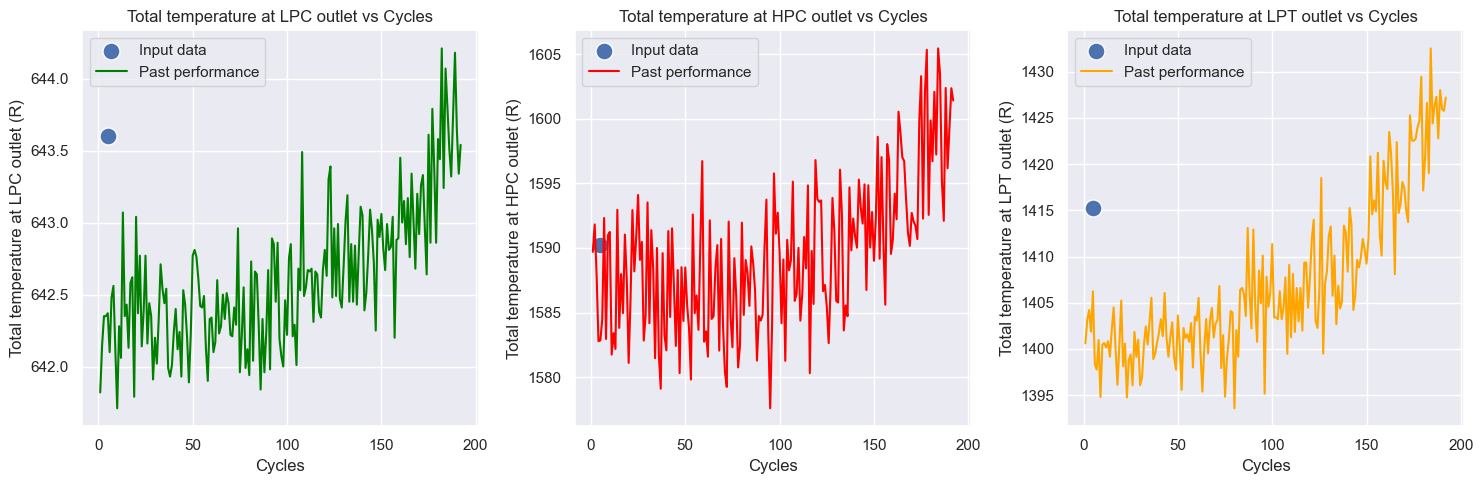

In [25]:
plot_temp_LPC_graph(df, 1)

In [26]:
def plot_coolant_graph(train, id, input_data=input_data):
  if(id == input_data[0][0]):
    # Extract specific data points
    x = input_data[0][1]
    y = input_data[0][13]
    z = input_data[0][14]

    # Create a single subplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    train_1 = train[train['ID'] == id]

    # 1st graph
    sns.scatterplot(x=[x], y=[y], s=150, ax=axes[0], label='Input data')
    sns.lineplot(x='cycles', y='W31', data=train_1, color='green', ax=axes[0], label='Past performance')
    axes[0].set_title('HPT coolant bleed vs Cycles')
    axes[0].set_xlabel('Cycles')
    axes[0].set_ylabel('HPT coolant bleed (lbm/s)')
    axes[0].legend()

    # 2nd graph
    sns.scatterplot(x=[x], y=[z], s=150, ax=axes[1], label='Input data')
    sns.lineplot(x='cycles', y='W32', data=train_1, color='red', ax=axes[1], label='Past performance')
    axes[1].set_title('LPT coolant bleed vs Cycles')
    axes[1].set_xlabel('Cycles')
    axes[1].set_ylabel('LPT coolant bleed (lbm/s)')
    axes[1].legend()


    # Show plot
    plt.tight_layout()
    plt.show()
  else:
    print("Invalid input")

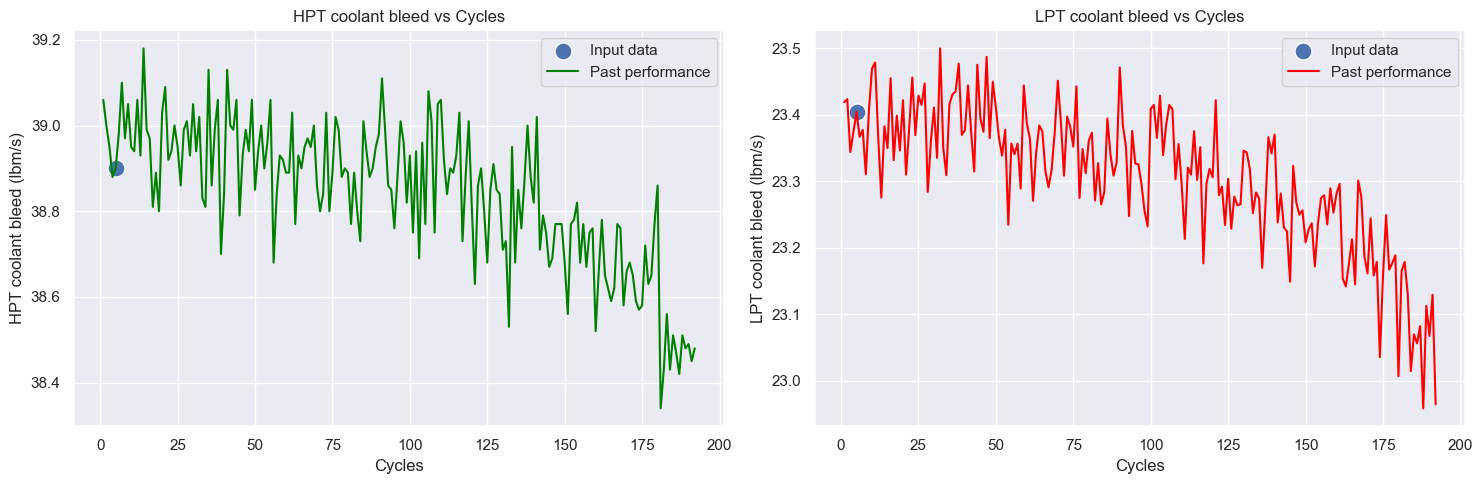

In [27]:
plot_coolant_graph(df, 1)

In [28]:
def plot_fan_graph(train, id, input_data=input_data):
  if(id == input_data[0][0]):
    # Extract specific data points
    x = input_data[0][1]
    y = input_data[0][5]

    # Create a single subplot
    fig, ax = plt.subplots(figsize=(8, 6))  # Single plot

    # Scatter plot
    sns.scatterplot(x=[x], y=[y], s=150, ax=ax, label='Input data')

    # Line plot
    train_1 = train[train['ID'] == id]
    sns.lineplot(x='cycles', y='Nf', data=train_1, color='green', ax=ax, label='Past performance')

    # Set titles and labels
    ax.set_title('Physical Fan speed vs Cycles')
    ax.set_xlabel('Cycles')
    ax.set_ylabel('Physical Fan speed (rpm)')
    ax.legend()

    # Show plot
    plt.tight_layout()
    plt.show()
  else:
    print("Invalid input")


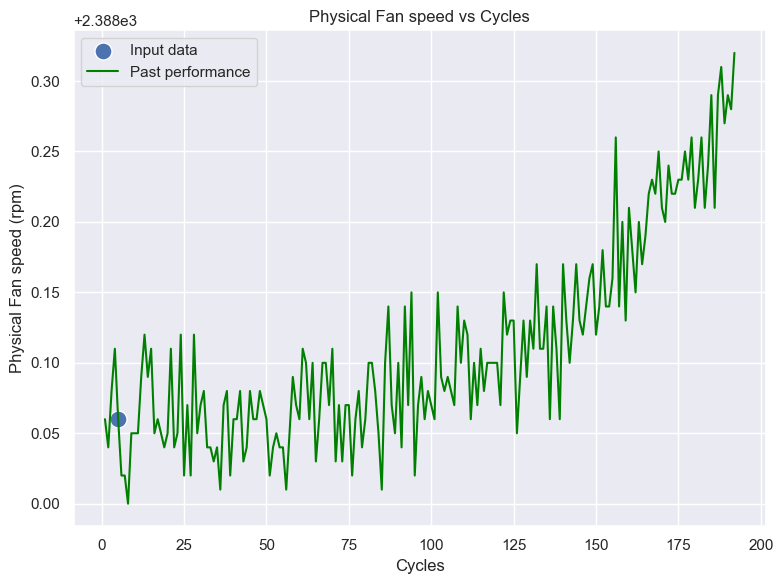

In [29]:
plot_fan_graph(df, 1)

In [30]:
import joblib

joblib.dump(pipe, 'pipe.pkl')

['pipe.pkl']